## Importing Libraries

In [197]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from scipy import stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from IPython.display import display, HTML

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Load Dataframe

In [95]:
df = pd.read_csv('mskcc.txt', sep = "	",index_col=['PATIENT_ID','Tumor_Sample_Barcode'])

In [4]:
df.shape

(1610, 483)

## Categorical Datatypes

To find all the categorical datatype columns, I have used the `dtypes` method of `pandas` and printed all the columns which do not have the `float64` datatype.

In [5]:
# Get all the categorical datatypes

df.dtypes[df.dtypes !='float64']

SEX              object
OS_MONTHS         int64
OS_STATUS        object
AGE_GROUP        object
DRUG_TYPE        object
ONCOTREE_CODE    object
SAMPLE_TYPE      object
CANCER_TYPE      object
dtype: object

In [7]:
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [8]:
# Get the different cancer types. We need to group by these values later 
df['CANCER_TYPE'].unique()

array(['Breast Cancer', 'Esophagogastric Cancer', 'Bladder Cancer',
       'Non-Small Cell Lung Cancer', 'Glioma', 'Head and Neck Cancer',
       'Melanoma', 'Colorectal Cancer', 'Renal Cell Carcinoma',
       'Cancer of Unknown Primary', 'Skin Cancer, Non-Melanoma'],
      dtype=object)

In [240]:
#mapping to make it more readable
mapping = {'Breast Cancer': 'BRC', 'Esophagogastric Cancer':'ESC', 'Bladder Cancer':'BLC',
       'Non-Small Cell Lung Cancer':'NSCLC', 'Glioma':'GL', 'Head and Neck Cancer':'HNC',
       'Melanoma':'ML', 'Colorectal Cancer':'CC', 'Renal Cell Carcinoma':'RCC',
       'Cancer of Unknown Primary':'CUPC', 'Skin Cancer, Non-Melanoma':'SC'}

#Inverse mapping for later use
inv_map = {v: k for k, v in mapping.items()}

df = df.replace({'CANCER_TYPE':mapping})
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4,OS_MONTHS_TRANS
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [97]:
# Encode the labels i.e. the LIVING or the DECEASED
#PREPROCESSING OF FEATURES
#encoding OS_STATUS
labelenc = preprocessing.LabelEncoder()
labelenc.fit(df['OS_STATUS'])
status_trans = labelenc.transform(df['OS_STATUS'])
df['y']=status_trans

df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

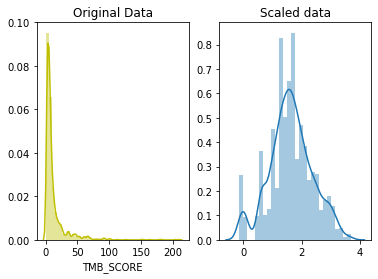

In [99]:
#encoding TMB_SCORE, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data

TMB_SCORE_TRANS,_ = stats.boxcox(df['TMB_SCORE'])
df['TMB_SCORE_TRANS'] = TMB_SCORE_TRANS
fig, ax=plt.subplots(1,2)
sns.distplot(df['TMB_SCORE'], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(TMB_SCORE_TRANS, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()


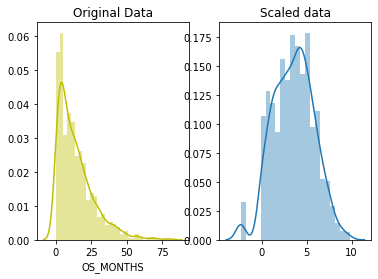

In [126]:
#encoding OS_MONTHS, which has exponential distribution
#Hence we use BOX-COX transformation to scale the data
OS_MONTHS_TRANS,_ = stats.boxcox(df['OS_MONTHS']+0.01)
df['OS_MONTHS_TRANS'] = OS_MONTHS_TRANS
#X['OS_MONTHS_TRANS'] = OS_MONTHS_TRANS
fig, ax=plt.subplots(1,2)
sns.distplot(df['OS_MONTHS'], ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(OS_MONTHS_TRANS, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [13]:
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y,TMB_SCORE_TRANS
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [127]:
df['DRUG_TYPE_PD1']=[1 if any([drg_val=='PD-1/PDL-1', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]
df['DRUG_TYPE_CTLA4']=[1 if any([drg_val=='CTLA4', drg_val=='Combo']) else 0 for drg_val in df['DRUG_TYPE']]

In [15]:
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [128]:
#encoding AGE_GROUP
#cleaning data values
df = df.replace({'AGE_GROUP' : { '>71' : '71-100', '<30' : '0-30' }})

In [107]:
# df['AGE_GROUP'].dtypes

In [212]:
df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,SEX,OS_MONTHS,OS_STATUS,AGE_GROUP,DRUG_TYPE,ONCOTREE_CODE,SAMPLE_TYPE,CANCER_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4
PATIENT_ID,Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000057,P-0000057-T01-IM3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [213]:
df.shape

(1610, 487)

In [247]:
get_dummy_cols = ['SEX', 'AGE_GROUP', 'SAMPLE_TYPE', 'ONCOTREE_CODE','CANCER_TYPE']
df_copy = pd.get_dummies(df, columns=get_dummy_cols, prefix = get_dummy_cols)

In [248]:
df_copy.shape

(1610, 595)

In [249]:
df_copy.head(10)

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,TMB_SCORE,OS_MONTHS,OS_STATUS,DRUG_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4,OS_MONTHS_TRANS,SEX_Female,SEX_Male,AGE_GROUP_0-30,AGE_GROUP_31-50,AGE_GROUP_50-60,AGE_GROUP_61-70,AGE_GROUP_71-100,SAMPLE_TYPE_Metastasis,SAMPLE_TYPE_Primary,ONCOTREE_CODE_AASTR,ONCOTREE_CODE_ACRM,ONCOTREE_CODE_ADNOS,ONCOTREE_CODE_AODG,ONCOTREE_CODE_ARMM,ONCOTREE_CODE_ASTR,ONCOTREE_CODE_BLAD,ONCOTREE_CODE_BLCA,ONCOTREE_CODE_BLSC,ONCOTREE_CODE_BRCA,ONCOTREE_CODE_BRCANOS,ONCOTREE_CODE_BRCNOS,ONCOTREE_CODE_CCRCC,ONCOTREE_CODE_CHRCC,ONCOTREE_CODE_COAD,ONCOTREE_CODE_COADREAD,ONCOTREE_CODE_CSCC,ONCOTREE_CODE_CUP,ONCOTREE_CODE_CUPNOS,ONCOTREE_CODE_DESM,ONCOTREE_CODE_EGC,ONCOTREE_CODE_EPDCA,ONCOTREE_CODE_ESCA,ONCOTREE_CODE_ESCC,ONCOTREE_CODE_ESMM,ONCOTREE_CODE_FHRCC,ONCOTREE_CODE_GB,ONCOTREE_CODE_GBM,ONCOTREE_CODE_GEJ,ONCOTREE_CODE_GSARC,ONCOTREE_CODE_HGGNOS,ONCOTREE_CODE_HNMUCM,ONCOTREE_CODE_HNNE,ONCOTREE_CODE_HNSC,ONCOTREE_CODE_HNSCUP,ONCOTREE_CODE_HPHSC,ONCOTREE_CODE_IDC,ONCOTREE_CODE_ILC,ONCOTREE_CODE_ISTAD,ONCOTREE_CODE_LGGNOS,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUAS,ONCOTREE_CODE_LUNE,ONCOTREE_CODE_LUPC,ONCOTREE_CODE_LUSC,ONCOTREE_CODE_LXSC,ONCOTREE_CODE_MACR,ONCOTREE_CODE_MDLC,ONCOTREE_COD

In [250]:
# Remove the columns 'TMB_SCORE', 'DRUG_TYPE'
columns_to_drop = ['TMB_SCORE', 'DRUG_TYPE','OS_STATUS','OS_MONTHS']
df_copy.drop(columns_to_drop,axis=1,inplace=True)


In [131]:
df_copy.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,CANCER_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4,OS_MONTHS_TRANS,SEX_Female,SEX_Male,AGE_GROUP_0-30,AGE_GROUP_31-50,AGE_GROUP_50-60,AGE_GROUP_61-70,AGE_GROUP_71-100,SAMPLE_TYPE_Metastasis,SAMPLE_TYPE_Primary,ONCOTREE_CODE_AASTR,ONCOTREE_CODE_ACRM,ONCOTREE_CODE_ADNOS,ONCOTREE_CODE_AODG,ONCOTREE_CODE_ARMM,ONCOTREE_CODE_ASTR,ONCOTREE_CODE_BLAD,ONCOTREE_CODE_BLCA,ONCOTREE_CODE_BLSC,ONCOTREE_CODE_BRCA,ONCOTREE_CODE_BRCANOS,ONCOTREE_CODE_BRCNOS,ONCOTREE_CODE_CCRCC,ONCOTREE_CODE_CHRCC,ONCOTREE_CODE_COAD,ONCOTREE_CODE_COADREAD,ONCOTREE_CODE_CSCC,ONCOTREE_CODE_CUP,ONCOTREE_CODE_CUPNOS,ONCOTREE_CODE_DESM,ONCOTREE_CODE_EGC,ONCOTREE_CODE_EPDCA,ONCOTREE_CODE_ESCA,ONCOTREE_CODE_ESCC,ONCOTREE_CODE_ESMM,ONCOTREE_CODE_FHRCC,ONCOTREE_CODE_GB,ONCOTREE_CODE_GBM,ONCOTREE_CODE_GEJ,ONCOTREE_CODE_GSARC,ONCOTREE_CODE_HGGNOS,ONCOTREE_CODE_HNMUCM,ONCOTREE_CODE_HNNE,ONCOTREE_CODE_HNSC,ONCOTREE_CODE_HNSCUP,ONCOTREE_CODE_HPHSC,ONCOTREE_CODE_IDC,ONCOTREE_CODE_ILC,ONCOTREE_CODE_ISTAD,ONCOTREE_CODE_LGGNOS,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUAS,ONCOTREE_CODE_LUNE,ONCOTREE_CODE_LUPC,ONCOTREE_CODE_LUSC,ONCOTREE_CODE_LXSC,ONCOTREE_CODE_MACR,ONCOTREE_CODE_MDLC,ONCOTREE_CODE_MEL,ONCOTREE_CODE_MSTAD,ON

In [251]:
df_copy.to_pickle('filtered.pkl')

In [117]:
# unpickled_df.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,OS_MONTHS,CANCER_TYPE,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4,SEX_Female,SEX_Male,AGE_GROUP_0-30,AGE_GROUP_31-50,AGE_GROUP_50-60,AGE_GROUP_61-70,AGE_GROUP_71-100,SAMPLE_TYPE_Metastasis,SAMPLE_TYPE_Primary,ONCOTREE_CODE_AASTR,ONCOTREE_CODE_ACRM,ONCOTREE_CODE_ADNOS,ONCOTREE_CODE_AODG,ONCOTREE_CODE_ARMM,ONCOTREE_CODE_ASTR,ONCOTREE_CODE_BLAD,ONCOTREE_CODE_BLCA,ONCOTREE_CODE_BLSC,ONCOTREE_CODE_BRCA,ONCOTREE_CODE_BRCANOS,ONCOTREE_CODE_BRCNOS,ONCOTREE_CODE_CCRCC,ONCOTREE_CODE_CHRCC,ONCOTREE_CODE_COAD,ONCOTREE_CODE_COADREAD,ONCOTREE_CODE_CSCC,ONCOTREE_CODE_CUP,ONCOTREE_CODE_CUPNOS,ONCOTREE_CODE_DESM,ONCOTREE_CODE_EGC,ONCOTREE_CODE_EPDCA,ONCOTREE_CODE_ESCA,ONCOTREE_CODE_ESCC,ONCOTREE_CODE_ESMM,ONCOTREE_CODE_FHRCC,ONCOTREE_CODE_GB,ONCOTREE_CODE_GBM,ONCOTREE_CODE_GEJ,ONCOTREE_CODE_GSARC,ONCOTREE_CODE_HGGNOS,ONCOTREE_CODE_HNMUCM,ONCOTREE_CODE_HNNE,ONCOTREE_CODE_HNSC,ONCOTREE_CODE_HNSCUP,ONCOTREE_CODE_HPHSC,ONCOTREE_CODE_IDC,ONCOTREE_CODE_ILC,ONCOTREE_CODE_ISTAD,ONCOTREE_CODE_LGGNOS,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUAS,ONCOTREE_CODE_LUNE,ONCOTREE_CODE_LUPC,ONCOTREE_CODE_LUSC,ONCOTREE_CODE_LXSC,ONCOTREE_CODE_MACR,ONCOTREE_CODE_MDLC,ONCOTREE_CODE_MEL,ONCOTREE_CODE_MSTAD,ONCOTREE

In [274]:
X = pd.read_pickle('filtered.pkl')

## LOGISTIC REGRESSION
We will explore the data with Logistic regression: we will start with logistic regression on the whole data and check the accuracy of the model. Then we will do feature selection by filtering the features and hence reducing dimensionality, and check accuracy for those features. Finally we will select the most important features for each `CANCER_TYPE` group and corresponding accuracy.

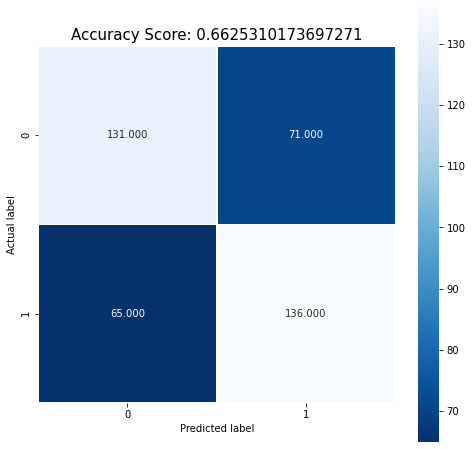

In [275]:
#Extract y
y=X['y']
columns_to_drop = ['y']
X_copy = X.drop(columns_to_drop,axis=1)
X_copy.reset_index(drop=True)


#Logistic regression without selecting features or reducing dimensionality
x_train, x_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25, random_state=42)
logistic_regression_model = LogisticRegression(max_iter = 4000)
logistic_regression_model.fit(x_train, y_train)
y_predictions = logistic_regression_model.predict(x_test)
score = logistic_regression_model.score(x_test, y_test)


#Calculation of Confusion matric
cm = metrics.confusion_matrix(y_test, y_predictions)


#Plotting heat map
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
fig.savefig("cm_pp.jpg")



In [277]:
#Feature Selection : Methods followed

#Filter methods: Removing almost constant features with very little variance
lenp=[]
print ('{:<30}{:<30}'.format('Variance <', 'Number of columns'))
for i in range(0,24):
    var = fs.VarianceThreshold(threshold=(i/100))
    var.fit(X_copy)
    dropped_columns = [column for column in X_copy.columns
                    if column not in X_copy.columns[var.get_support()]]
    lenp.append(len(dropped_columns))
    print ('{:<30}{:<30}'.format(i/100, len(dropped_columns)))




Variance <                    Number of columns             
0.0                           0                             
0.01                          250                           
0.02                          370                           
0.03                          450                           
0.04                          490                           
0.05                          514                           
0.06                          536                           
0.07                          550                           
0.08                          559                           
0.09                          564                           
0.1                           568                           
0.11                          572                           
0.12                          573                           
0.13                          574                           
0.14                          575                           
0.15                    

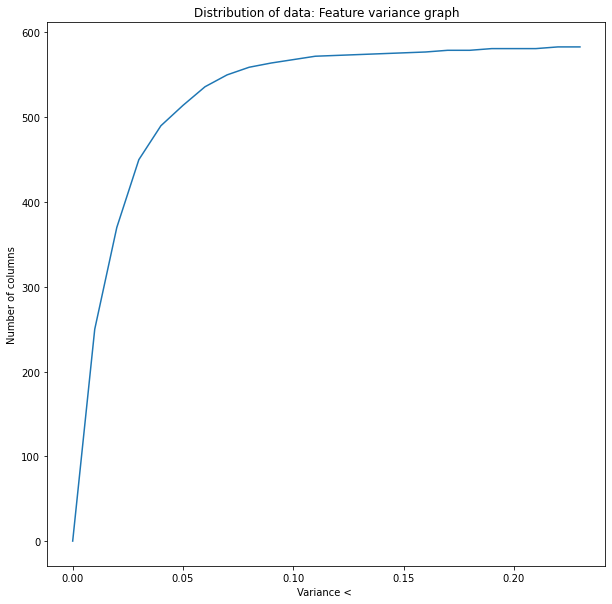

In [283]:
#plotting variance vs number of columns
fig = plt.figure(figsize=(10,10))
plt.plot([i/100 for i in range(0, 24)],lenp)
plt.xlabel("Variance < ")
plt.ylabel("Number of columns")
plt.title("Distribution of data: Feature variance graph")
plt.show()
fig.savefig("feature_variance.jpg")



In [280]:
#drop the data below variance threshold = 0.1
var = fs.VarianceThreshold(threshold=0.1)
var.fit(X_copy)
dropped_columns = [column for column in X_copy.columns
                    if column not in X_copy.columns[var.get_support()]]

#X_trans = var.transform(X)
X_filter1=X_copy.drop(labels=dropped_columns, axis=1, inplace=False)



#print(X_filter1.columns.to_list())
print("Features selected after removing constant or almost constant features:\n")
print(X_filter1.columns.to_list())

#X.head()
#len(dropped_columns)
#X.head()


Features selected after removing constant or almost constant features:

['ARID1A', 'KRAS', 'NF1', 'PIK3CA', 'TERT', 'TP53', 'TMB_SCORE_TRANS', 'DRUG_TYPE_CTLA4', 'OS_MONTHS_TRANS', 'SEX_Female', 'SEX_Male', 'AGE_GROUP_31-50', 'AGE_GROUP_50-60', 'AGE_GROUP_61-70', 'AGE_GROUP_71-100', 'SAMPLE_TYPE_Metastasis', 'SAMPLE_TYPE_Primary', 'ONCOTREE_CODE_LUAD', 'ONCOTREE_CODE_SKCM', 'CANCER_TYPE_BLC', 'CANCER_TYPE_ML', 'CANCER_TYPE_NSCLC']


22

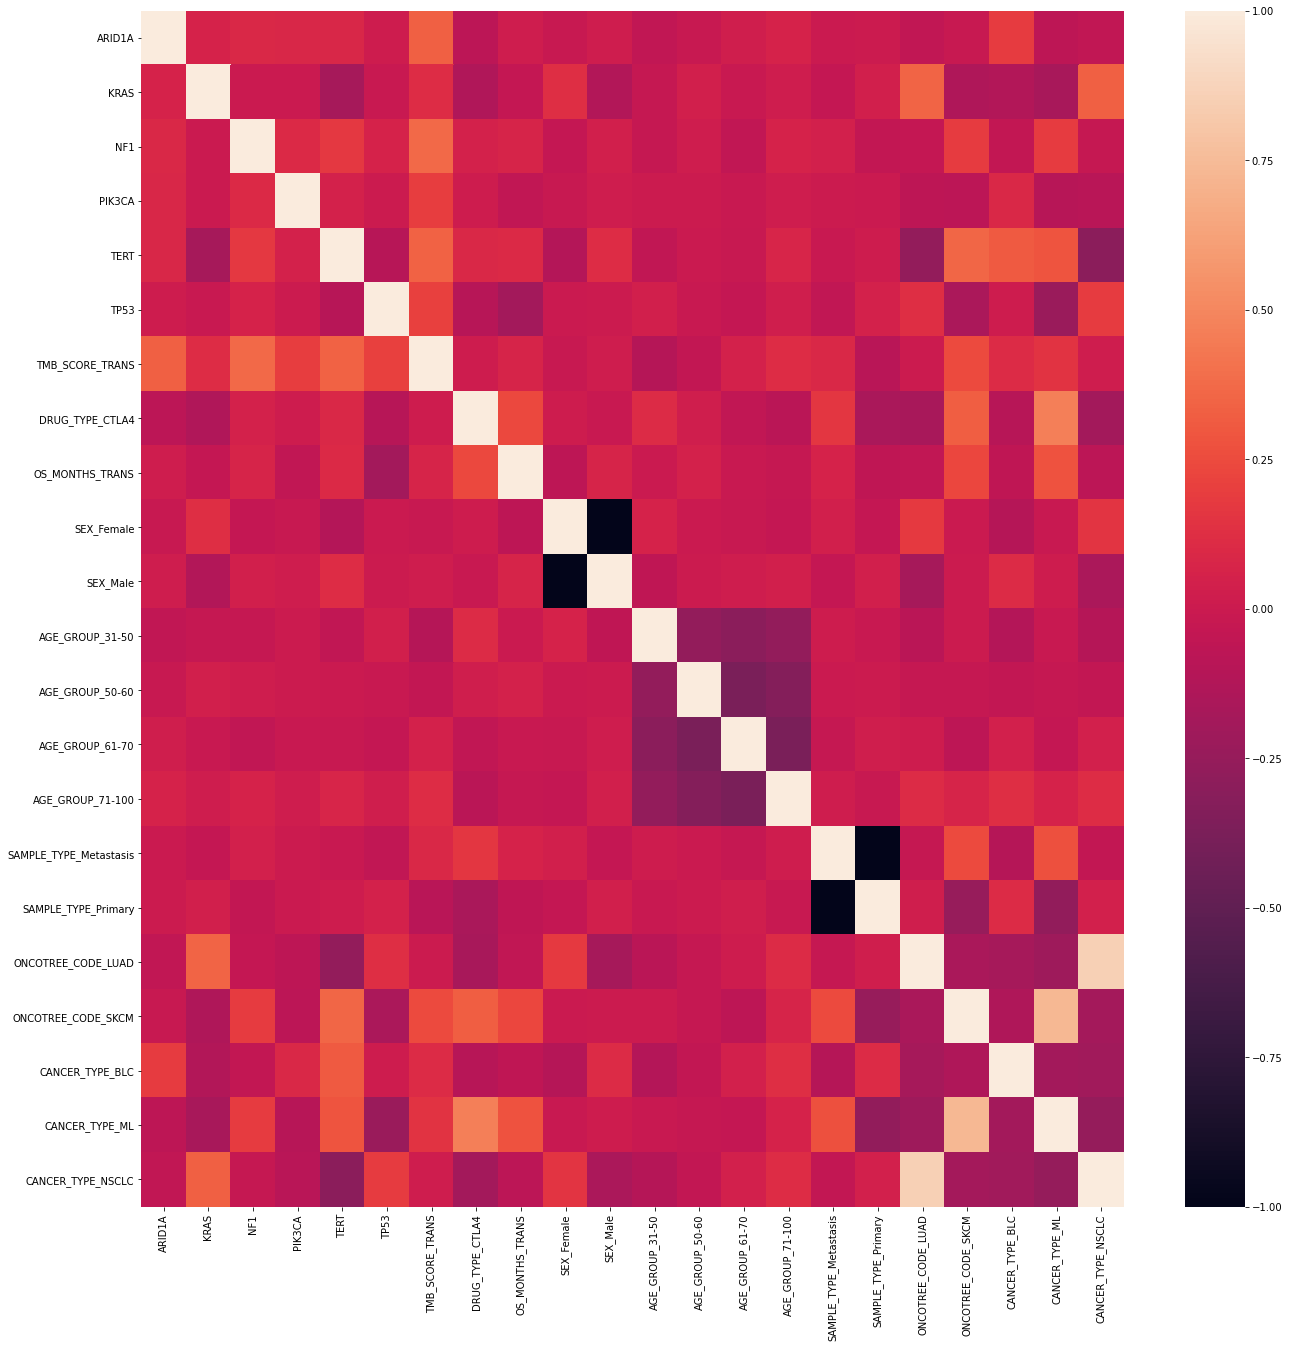

In [284]:
#Feature selection by detecting correlation between 2 features
#Visualisation of correlation matrix
corr_matrix = X_filter1.corr()
#print(corr_matrix)
len_corr,_ = corr_matrix.shape
#print(len_corr)
fig=plt.figure(figsize=(len_corr,len_corr))
sns.heatmap(corr_matrix)
fig.savefig("heatmap.jpg")

In [259]:
#Feature selection by detecting correlation between 2 features
corr_features=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(corr_matrix.columns[i],corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            corr_features.append(colname)

print(corr_features)
            
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)
X_filter=X_filter1.drop(labels=corr_features, axis=1, inplace=False)

SEX_Male SEX_Female
SAMPLE_TYPE_Primary SAMPLE_TYPE_Metastasis
CANCER_TYPE_ML ONCOTREE_CODE_SKCM
CANCER_TYPE_NSCLC ONCOTREE_CODE_LUAD
['SEX_Male', 'SAMPLE_TYPE_Primary', 'CANCER_TYPE_ML', 'CANCER_TYPE_NSCLC']


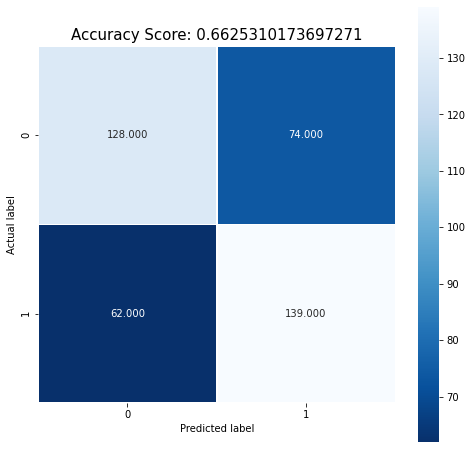

In [285]:
#Logistic regression using this new reduced set of features after removing near-constant features and correlated features
x_train, x_test, y_train, y_test = train_test_split(X_filter, y, test_size=0.25, random_state=42)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
y_predictions = logistic_regression_model.predict(x_test)
score = logistic_regression_model.score(x_test, y_test)


cm = metrics.confusion_matrix(y_test, y_predictions)


#Plotting heat map
fig=plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
fig.savefig("cm_filter.jpg")



In [297]:
#Calculating importance of each feature

feature_list=list(X_filter.columns) #list of features 
features = np.array(feature_list)


importances = logistic_regression_model.coef_.tolist() #importance using coefficient


feature_importances = [(feature[:20], importance) for feature, importance in zip(feature_list, importances[0])]

[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

#fig = plt.figure(figsize=(20,9))
#plt.bar(feature_list, importances[0])
#plt.xticks(rotation=90)
#plt.show()
#fig.savefig("imp_filter.jpg")



Feature: ARID1A                         Importance: 0.4546215311108661
Feature: KRAS                           Importance: -0.1936937579437258
Feature: NF1                            Importance: 0.029181957667632766
Feature: PIK3CA                         Importance: -0.4410004617340524
Feature: TERT                           Importance: 0.07448693605228743
Feature: TP53                           Importance: 0.43660752698881594
Feature: TMB_SCORE_TRANS                Importance: -0.0870119695830146
Feature: DRUG_TYPE_CTLA4                Importance: 0.43002210166624444
Feature: OS_MONTHS_TRANS                Importance: 0.06652073559496424
Feature: SEX_Female                     Importance: -0.047300708530839675
Feature: AGE_GROUP_31-50                Importance: 0.12939093556055833
Feature: AGE_GROUP_50-60                Importance: 0.013076610811086714
Feature: AGE_GROUP_61-70                Importance: 0.11588192340111964
Feature: AGE_GROUP_71-100               Importance: 0.0229977

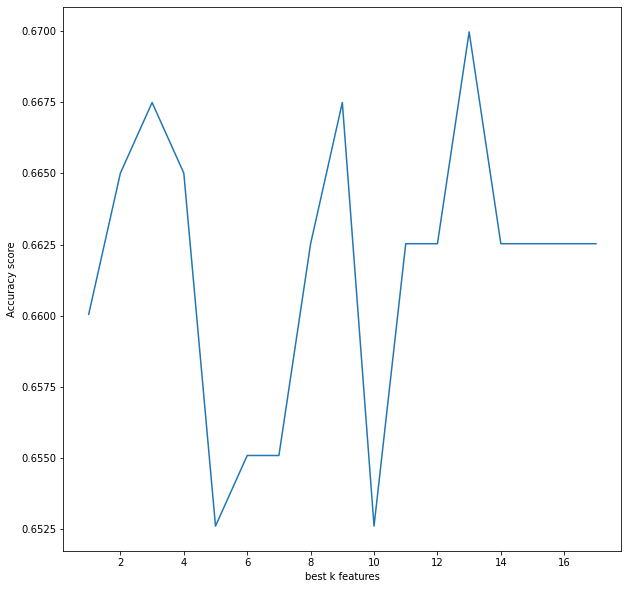

In [296]:
#We will reduce the number of features further by selecting k best features. 

accuracy_list = []
for select_k in range(1, len(X_filter.columns)):
    bk = fs.SelectKBest(fs.f_classif, k=select_k)
    bk.fit(X_filter, y)
    X_trans = bk.transform(X_filter)
    x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_train, y_train)
    y_predictions = logistic_regression_model.predict(x_test)
    #score = metrics.f1_score(y_test, y_predictions)
    score = logistic_regression_model.score(x_test, y_test)
    accuracy_list.append(score)

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(X_filter.columns)), accuracy_list)
plt.xlabel("best k features")
plt.ylabel("Accuracy score")
plt.show()
fig.savefig("kvalue.jpg")

In [263]:
#Find k with maximum accuracy
select_k=accuracy_list.index(max(accuracy_list))+1
print("Selected k="+str(select_k))

Selected k=13


In [264]:
#Selection of k best features
bk = fs.SelectKBest(fs.f_classif, k=select_k)
bk.fit(X_filter, y)
X_trans = bk.transform(X_filter)



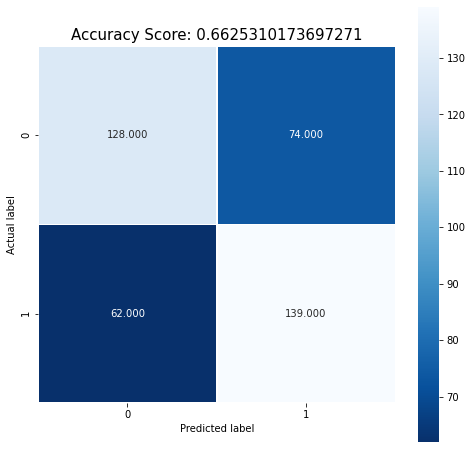

In [289]:
#Logistic regression with k best features

x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
y_predictions = logistic_regression_model.predict(x_test)
score = logistic_regression_model.score(x_test, y_test)


cm = metrics.confusion_matrix(y_test, y_predictions)


#Plotting heat map
fig=plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

fig.savefig("cm_final.jpg")



Feature: ARID1A                         Importance: 0.4546215311108661
Feature: NF1                            Importance: -0.1936937579437258
Feature: PIK3CA                         Importance: 0.029181957667632766
Feature: TERT                           Importance: -0.4410004617340524
Feature: TP53                           Importance: 0.07448693605228743
Feature: TMB_SCORE_TRANS                Importance: 0.43660752698881594
Feature: DRUG_TYPE_CTLA4                Importance: -0.0870119695830146
Feature: OS_MONTHS_TRANS                Importance: 0.43002210166624444
Feature: SEX_Female                     Importance: 0.06652073559496424
Feature: AGE_GROUP_31-50                Importance: -0.047300708530839675
Feature: AGE_GROUP_50-60                Importance: 0.12939093556055833
Feature: AGE_GROUP_61-70                Importance: 0.013076610811086714
Feature: AGE_GROUP_71-100               Importance: 0.11588192340111964
Feature: SAMPLE_TYPE_Metastas           Importance: 0.0229977

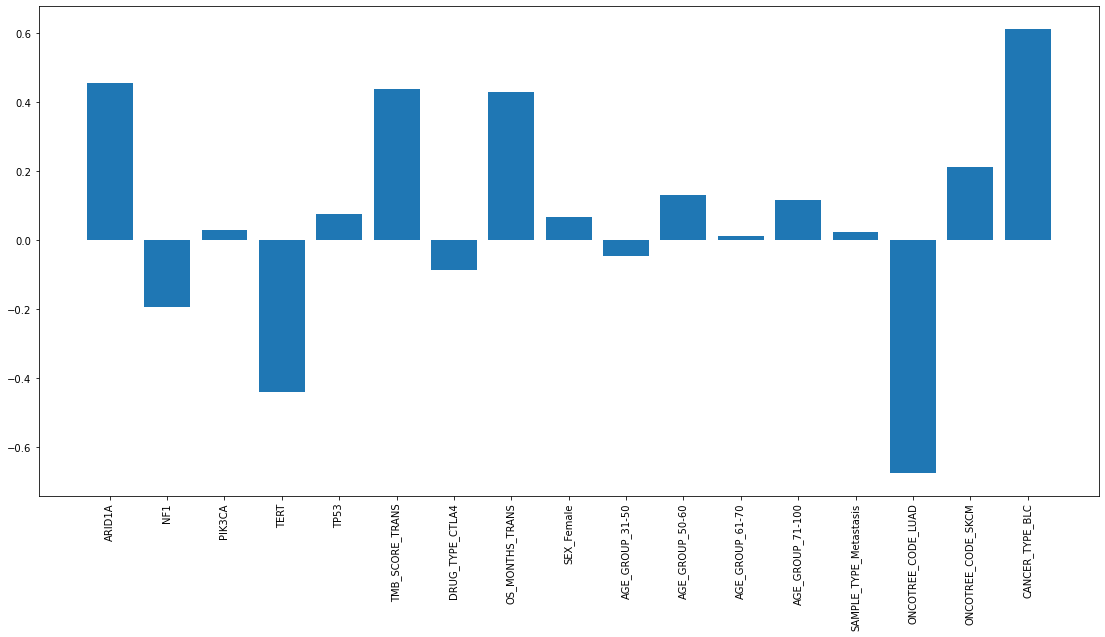

In [294]:
mask = bk.get_support()
feature_list = X_filter.columns[mask].to_list()

features = np.array(feature_list)


importances = logistic_regression_model.coef_.tolist()
#importances[0]

feature_importances = [(feature[:20], importance) for feature, importance in zip(feature_list, importances[0])]

[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

fig = plt.figure(figsize=(19,9))
plt.bar(feature_list, importances[0])
plt.xticks(rotation=90)
plt.show()
fig.savefig("imp_fin.jpg")
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [272]:
bk = fs.SelectKBest(fs.f_classif, k=10)
bk.fit(X_filter, y)
X_trans = bk.transform(X_filter)

#C = np.logspace(-4, 4, num=20)
#penalty = ['l2']
#solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs']
#hyperparameters = dict(C=C, penalty=penalty, solver=solver)
#logistic = LogisticRegression()
#gridsearch = GridSearchCV(logistic, hyperparameters)
#best_model_grid = gridsearch.fit(X_filter, y)
#print(best_model_grid.best_estimator_)
#print(best_model_grid.best_score_)

#fig.savefig("output/img.png")
#plt.close(fig)

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2','l1']
c_values = np.logspace(-4, 4, num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_trans, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.693789 using {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'newton-cg'}


In [273]:
models = [{'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=42),
           'grid': {"C":np.logspace(-3,3,10), "penalty":["l2"]},
           'classifier__solver' : ['liblinear', 'newton-cg','saga']},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {"n_neighbors":np.arange(8)+1}},
          
          {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=42),
           'grid': {"max_depth":np.arange(8)+1}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=42),
           'grid': {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}},
          
          {'name': 'svm_rbf', 'label': 'SVC (RBF)',
           'classifier':SVC(random_state=42),
           'grid': {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}}]


def model_selection(classifier, name, grid, X_train, y_train, scoring):
    
    gridsearch_cv=GridSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring)
    
    gridsearch_cv.fit(X_train, y_train)
    
    results_dict = {}
    
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['score'] = gridsearch_cv.best_score_
    
    return(results_dict)

results = [model_selection(m['classifier'],m['name'],m['grid'],X_trans,y,'accuracy') for m in models]

results_df = pd.DataFrame(results).sort_values(by='score', ascending = False)
print(results_df)

  classifier_name                                         classifier                                        best_params     score
4         svm_rbf           SVC(C=10, gamma=0.0001, random_state=42)        {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}  0.691304
0          logreg  LogisticRegression(C=0.004641588833612777, ran...       {'C': 0.004641588833612777, 'penalty': 'l2'}  0.686957
3              rf  (DecisionTreeClassifier(criterion='entropy', m...  {'criterion': 'entropy', 'max_depth': 5, 'max_...  0.683230
2             dsc  DecisionTreeClassifier(max_depth=2, random_sta...                                   {'max_depth': 2}  0.676398
1             knn                KNeighborsClassifier(n_neighbors=7)                                 {'n_neighbors': 7}  0.650932


In [271]:
def filter_group(df_pass):

    var = fs.VarianceThreshold(threshold=0.11)
    var.fit(df_pass)
    dropped_columns = [column for column in df_pass.columns
                    if column not in df_pass.columns[var.get_support()]]


    filtered_df=df_pass.drop(labels=dropped_columns, axis=1, inplace=False)
    return(filtered_df)

def correlate_group(df_pass):

    corr_matrix = df_pass.corr()
    len_corr,_ = corr_matrix.shape

    corr_features=[]
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                colname = corr_matrix.columns[i]
                corr_features.append(colname)
            
    corr_df=df_pass.drop(labels=corr_features, axis=1, inplace=False)
    corr_df=df_pass.drop(labels=corr_features, axis=1, inplace=False)
    return(corr_df)

def find_k(x, y):
    accuracy_list = []
    for select_k in range(3, len(x.columns)):
        bk = fs.SelectKBest(fs.f_classif, k=select_k)
        bk.fit(x, y)
        df_trans = bk.transform(x)
        x_train, x_test, y_train, y_test = train_test_split(df_trans, y, test_size=0.25, random_state=42)
        logistic_regression_model = LogisticRegression()
        logistic_regression_model.fit(x_train, y_train)
        y_predictions = logistic_regression_model.predict(x_test)
        score = logistic_regression_model.score(x_test, y_test)
        accuracy_list.append(score)
    max_k=accuracy_list.index(max(accuracy_list))+3
    return(max_k)
        

def predict_lr(x,y,k_pass):
    
    to_be_returned=[]
    bk = fs.SelectKBest(fs.f_classif, k=k_pass)
    bk.fit(x, y)
    X_trans = bk.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_train, y_train)
    y_predictions = logistic_regression_model.predict(x_test)
    score = logistic_regression_model.score(x_test, y_test)
    to_be_returned.append(score)


    mask = bk.get_support()
    new_features = x.columns[mask].to_list()
    to_be_returned.extend(new_features)
    #print(new_features)
    #return pd.Series(y_predictions)
    return (to_be_returned)


columns_to_drop = X.columns[X.columns.str.contains('CANCER_TYPE')]
new_dd = X.drop(columns_to_drop, axis=1, inplace = False)
new_dd['CANCER_TYPE']=df['CANCER_TYPE']

#print(new_dd.head(10))

df_ctype = pd.DataFrame(columns=['CANCER_TYPE', 'Size of data', 'Accuracy', 
                                 'Feature1', 'Feature2', 'Feature3', 
                                 'Feature4', 'Feature5', 'Feature6',
                                 'Feature7', 'Feature8', 'Feature9',
                                 'Feature10','Feature11','Feature12'])


number_of_samples = new_dd.groupby('CANCER_TYPE').size()
for r in new_dd['CANCER_TYPE'].unique():
    new_list=[r,len(new_dd.loc[df['CANCER_TYPE']==r].index)]
    #print(r)
    if len(new_dd.loc[df['CANCER_TYPE']==r].index)>10:
        ddf= new_dd.loc[df['CANCER_TYPE']==r]
        y_group = ddf['y']
        x_group = ddf.drop(['CANCER_TYPE','y'],axis=1,inplace=False)
        var_filter_x=filter_group(x_group)
        correlated_x=correlate_group(var_filter_x)
        #print(correlated_x.columns)
        k=find_k(correlated_x,y_group)
        rturn=predict_lr(correlated_x,y_group,k)
        new_list.extend(rturn)
        for i in range(0,12-k):
            new_list.extend('-')
        #[new_list.extend('-') for i in range[0,10-k]];
        #print(new_list)
        df_length = len(df_ctype)
        df_ctype.loc[df_length] = new_list
    else:
        print("Can't perform logistic regression on Cancer type"+ r + ", Reason: Size = " + str(len(new_dd.loc[df['CANCER_TYPE']==r].index)))

df_ctype = df_ctype.replace({'CANCER_TYPE':inv_map})
        
display(HTML(df_ctype.to_html()))





Can't perform logistic regression on SC, Reason: Size = 1


,CANCER_TYPE,Size of data,Accuracy,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12
0,Breast Cancer,41,0.818182,CDH1,TP53,OS_MONTHS_TRANS,-,-,-,-,-,-,-,-,-
1,Esophagogastric Cancer,118,0.766667,OS_MONTHS_TRANS,SEX_Female,AGE_GROUP_61-70,-,-,-,-,-,-,-,-,-
2,Bladder Cancer,211,0.735849,CDKN1A,CREBBP,MLL2,PIK3CA,TERT,TP53,TMB_SCORE_TRANS,OS_MONTHS_TRANS,SEX_Female,SAMPLE_TYPE_Metastasis,ONCOTREE_CODE_BLCA,-
3,Non-Small Cell Lung Cancer,344,0.837209,TMB_SCORE_TRANS,OS_MONTHS_TRANS,AGE_GROUP_50-60,-,-,-,-,-,-,-,-,-
4,Glioma,116,0.758621,OS_MONTHS_TRANS,AGE_GROUP_31-50,AGE_GROUP_61-70,-,-,-,-,-,-,-,-,-
5,Head and Neck Cancer,129,0.575758,PIK3CA,TMB_SCORE_TRANS,OS_MONTHS_TRANS,AGE_GROUP_31-50,AGE_GROUP_61-70,ONCOTREE_CODE_HNSC,-,-,-,-,-,-
6,Melanoma,313,0.759494,EPHA7,MLL,MLL2,MLL3,PTPRD,PTPRT,ROS1,TERT,DRUG_TYPE_PD1,OS_MONTHS_TRANS,ONCOTREE_CODE_SKCM,-
7,Colorectal Cancer,109,0.857143,APC,CREBBP,FAT1,FBXW7,NOTCH3,PTCH1,SOX9,TP53,OS_MONTHS_TRANS,SEX_Female,-,-
8,Renal Cell Carcinoma,143,0.861111,KDM5C,SETD2,VHL,DRUG_TYPE_CTLA4,OS_MONTHS_TRANS,SEX_Female,AGE_GROUP_50-60,-,-,-,-,-
9,Cancer of Unknown Primary,85,0.681818,TERT,DRUG_TYPE_CTLA4,SEX_Female,ONCOTREE_CODE_SCCNOS,-,-,-,-,-,-,-,-


Best: 0.692961 using {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'newton-cg'}


In [26]:
##

array(['BRC', 'ESC', 'BLC', 'NSCLC', 'GL', 'HNC', 'ML', 'CC', 'RCC',
       'CUPC', 'SC'], dtype=object)

In [172]:
# X_BRC = X[X['CANCER_TYPE'] == 'BRC']

In [173]:

Var_Corr = X.corr()
# plot the heatmap and annotation on it
# sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(Var_Corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(20, 20))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(Var_Corr, mask=mask)

In [174]:
# X_BRC = X[X['CANCER_TYPE'] == 'BRC']

In [178]:
# clf = DecisionTreeClassifier().fit(X_BRC, y_BRC)
get_dummy_cols = ['CANCER_TYPE']
X = pd.get_dummies(X, columns=get_dummy_cols, prefix = get_dummy_cols)
X.head()

,,ABL1,ACVR1,AGO2,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BABAM1,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CARM1,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC42,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2Ap14ARF,CDKN2Ap14IRF,CDKN2Ap16INK4A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSDE1,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,CYLD,CYSLTR2,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,DROSHA,DUSP4,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,ELF3,EP300,EPAS1,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERF,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH1,EZH2,FAM175A,FAM46C,FAM58A,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,GTF2I,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST3H3,HLA-A,HLA-B,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INPPL1,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KMT2A,KMT2B,KMT2C,KMT2D,KNSTRN,KRAS,LATS1,LATS2,LMO1,LYN,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAPK1,MAPK3,MAPKAP1,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MLL4,MPL,MRE11A,MSH2,MSH3,MSH6,MSI1,MSI2,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTHL1,NTRK1,NTRK2,NTRK3,NUF2,NUP93,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPARG,PPM1D,PPP2R1A,PPP4R2,PPP6C,PRDM1,PRDM14,PREX2,PRKAR1A,PRKCI,PRKD1,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAC2,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RRAGC,RRAS,RRAS2,RTEL1,RUNX1,RXRA,RYBP,SDHA,SDHAF2,SDHB,SDHC,SDHD,SESN1,SESN2,SESN3,SETD2,SETD8,SF3B1,SH2B3,SH2D1A,SHOC2,SHQ1,SLX4,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SMYD3,SOCS1,SOS1,SOX17,SOX2,SOX9,SPEN,SPOP,SPRED1,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK19,STK40,SUFU,SUZ12,SYK,TAP1,TAP2,TBX3,TCEB1,TCF3,TCF7L2,TEK,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP53BP1,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,UPF1,VEGFA,VHL,VTCN1,WHSC1,WHSC1L1,WT1,WWTR1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,OS_MONTHS,y,TMB_SCORE_TRANS,DRUG_TYPE_PD1,DRUG_TYPE_CTLA4,SEX_Female,SEX_Male,AGE_GROUP_0-30,AGE_GROUP_31-50,AGE_GROUP_50-60,AGE_GROUP_61-70,AGE_GROUP_71-100,SAMPLE_TYPE_Metastasis,SAMPLE_TYPE_Primary,ONCOTREE_CODE_AASTR,ONCOTREE_CODE_ACRM,ONCOTREE_CODE_ADNOS,ONCOTREE_CODE_AODG,ONCOTREE_CODE_ARMM,ONCOTREE_CODE_ASTR,ONCOTREE_CODE_BLAD,ONCOTREE_CODE_BLCA,ONCOTREE_CODE_BLSC,ONCOTREE_CODE_BRCA,ONCOTREE_CODE_BRCANOS,ONCOTREE_CODE_BRCNOS,ONCOTREE_CODE_CCRCC,ONCOTREE_CODE_CHRCC,ONCOTREE_CODE_COAD,ONCOTREE_CODE_COADREAD,ONCOTREE_CODE_CSCC,ONCOTREE_CODE_CUP,ONCOTREE_CODE_CUPNOS,ONCOTREE_CODE_DESM,ONCOTREE_CODE_EGC,ONCOTREE_CODE_EPDCA,ONCOTREE_CODE_ESCA,ONCOTREE_CODE_ESCC,ONCOTREE_CODE_ESMM,ONCOTREE_CODE_FHRCC,ONCOTREE_CODE_GB,ONCOTREE_CODE_GBM,ONCOTREE_CODE_GEJ,ONCOTREE_CODE_GSARC,ONCOTREE_CODE_HGGNOS,ONCOTREE_CODE_HNMUCM,ONCOTREE_CODE_HNNE,ONCOTREE_CODE_HNSC,ONCOTREE_CODE_HNSCUP,ONCOTREE_CODE_HPHSC,ONCOTREE_CODE_IDC,ONCOTREE_CODE_ILC,ONCOTREE_CODE_ISTAD,ONCOTREE_CODE_LGGNOS,ONCOTREE_CODE_LUAD,ONCOTREE_CODE_LUAS,ONCOTREE_CODE_LUNE,ONCOTREE_CODE_LUPC,ONCOTREE_CODE_LUSC,ONCOTREE_CODE_LXSC,ONCOTREE_CODE_MACR,ONCOTREE_CODE_MDLC,ONCOTREE_CODE_MEL,ONCOTREE_CODE_MSTAD,ONCOTREE_CODE_MTSCC,

In [201]:
## Decision Tree Classifier

y = X['y']
columns_to_drop = ['y']
X_copy = X.drop(columns_to_drop,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=42)

dc_clf = DecisionTreeClassifier(max_depth=6)
dc_clf = dc_clf.fit(X_train,y_train)
y_pred = dc_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# print(dc_clf.feature_importances_[1:10])

Accuracy: 0.6925465838509317


[Text(2143.334745762712, 3533.3999999999996, 'OS_MONTHS <= 13.5\ngini = 0.5\nsamples = 1288\nvalue = [637, 651]'),
 Text(1100.6313559322034, 2989.7999999999997, 'CANCER_TYPE_NSCLC <= 0.5\ngini = 0.449\nsamples = 762\nvalue = [503, 259]'),
 Text(744.7881355932203, 2446.2, 'KMT2D <= 0.5\ngini = 0.478\nsamples = 591\nvalue = [357, 234]'),
 Text(430.32203389830505, 1902.5999999999997, 'TGFBR2 <= 0.5\ngini = 0.465\nsamples = 544\nvalue = [344, 200]'),
 Text(264.8135593220339, 1358.9999999999995, 'CANCER_TYPE_ESC <= 0.5\ngini = 0.456\nsamples = 525\nvalue = [340, 185]'),
 Text(132.40677966101694, 815.3999999999996, 'CANCER_TYPE_CUPC <= 0.5\ngini = 0.436\nsamples = 448\nvalue = [304, 144]'),
 Text(66.20338983050847, 271.7999999999997, 'gini = 0.418\nsamples = 404\nvalue = [284, 120]'),
 Text(198.61016949152543, 271.7999999999997, 'gini = 0.496\nsamples = 44\nvalue = [20, 24]'),
 Text(397.22033898305085, 815.3999999999996, 'OS_MONTHS <= 4.5\ngini = 0.498\nsamples = 77\nvalue = [36, 41]'),
 Tex

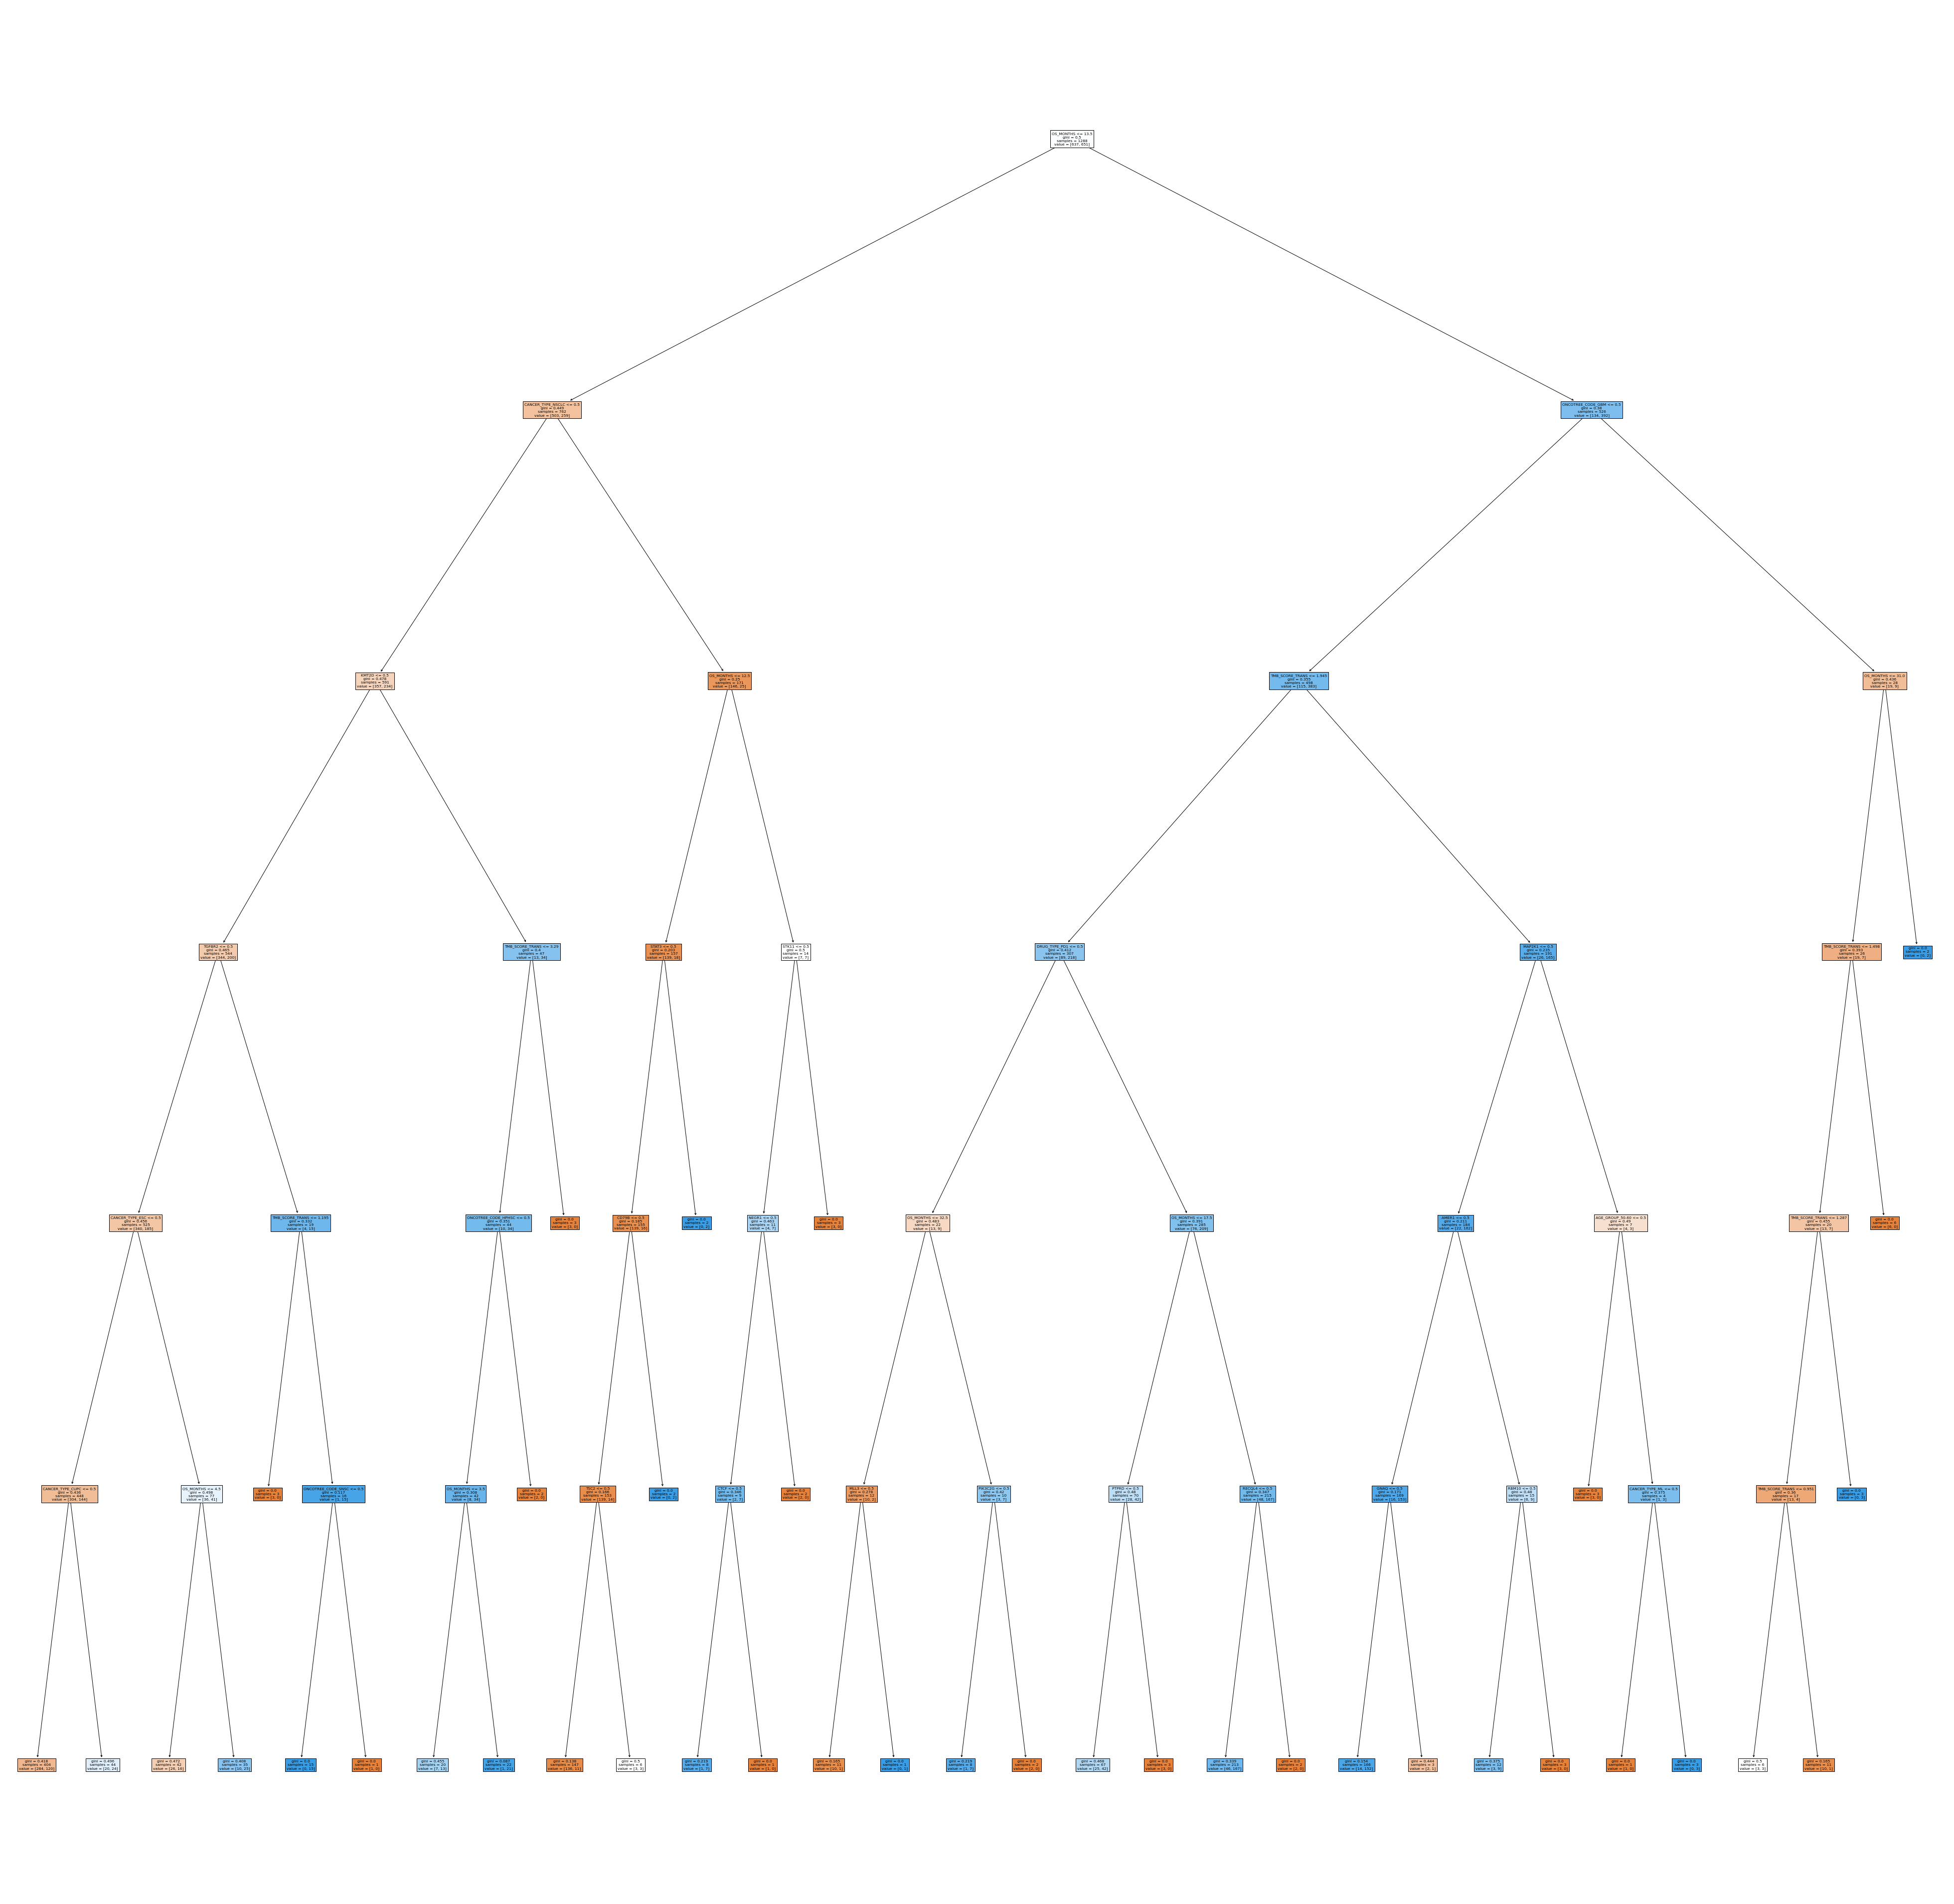

In [220]:
from sklearn import tree
fig = plt.figure(figsize=(70,70))
# _ = tree.plot_tree(dc_clf,feature_names=X_copy.columns.values,class_names=['0','1'])
plot_tree(dc_clf, feature_names=X_copy.columns.values, filled=True)